In [1]:
%load_ext autoreload
%autoreload 2
import cv2
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from src.datasets import ImageNetQuadDataset, setup_model
from src.attribution_wrapper import ClassSpecificAttributionWrapper
from src.utils import normalize_for_display, plot_pointing_game
import numpy as np

In [2]:
root_dir = "/home/c01niwa/CISPA-az6/algrec-2024/imagenet/data/"
data_dir = root_dir + "/ILSVRC/Data/CLS-LOC/val"
model_name = "resnet50"
device = "cuda"
quad_imagenetds = ImageNetQuadDataset(root_dir, data_dir,normalize=True,vit=False)
model = setup_model(device, model_name, pretrained=True)

In [3]:
ind = 0
quad_img, quad_labels = quad_imagenetds.__getitem__(ind)
attr = ClassSpecificAttributionWrapper("guided_backprop",model,class_indices=quad_labels, tau=0.01)

In [4]:
attributions = []
for label in quad_labels:
    attribution = attr.attribute(quad_img,label)
    vizu_np = np.transpose(attribution.squeeze(0).cpu().numpy(), (1, 2, 0))
    vizu_np = vizu_np * (vizu_np > 0)
    vizu = normalize_for_display(vizu_np, smooth=True)
    attributions.append(vizu)

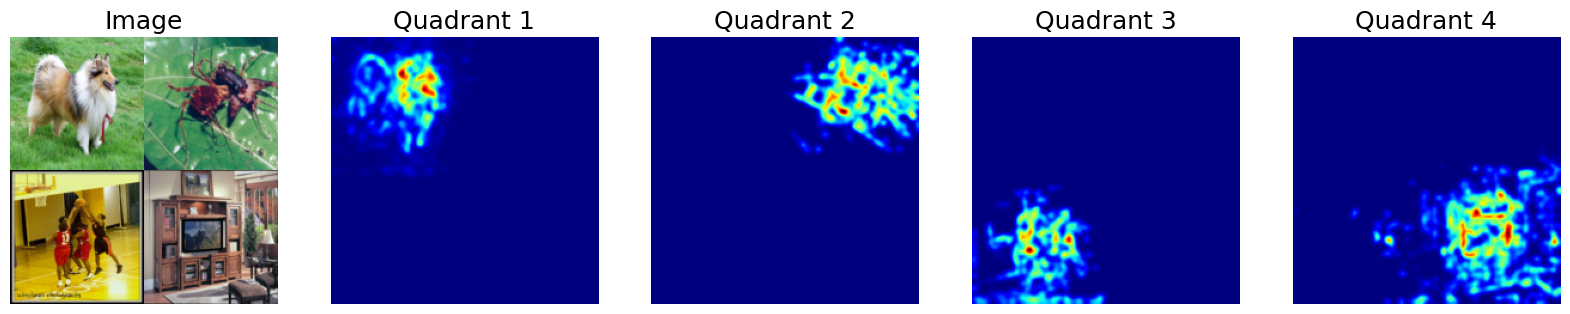

In [5]:
plot_pointing_game(quad_img, attributions)